# Project: Movie Time Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing a data set that contains information about 10,000 movies collected from The Movie Database (TMDb), which includes user ratings and revenue. We will look at trends of the most popular movie,  top genres, as well as properties assoicated with movies that have high revenues vs budget cost. We will uses the "tmdb-movies.csv" dataset to collect data of Movies chararistics to underground further investigation of the data at hand, to determine if the higher budgets by genre genre generate higher revenues.

> Which genres are most popular for the last 10 years? 

> What are the Top 10 grossing movies in the dataset?

> What kinds of properties are associated with movies that have high revenues?


In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# % matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
# Get a sample of Movie Data columns and rows
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Note**: The dataset is pretty clean and there's no need to really clean any of the data elements.

### General Properties

In [3]:
# Get the column and row size of the data set (stats)
df.shape

(10866, 21)

In [4]:
# Sample of data prior to analysis (stats)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Statistics on the columns (stats)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Column data types and missing values (stats)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# Count the number of duplicate records (function)
sum(df.duplicated())

1

In [8]:
# Drop duplicates (function)
df.drop_duplicates(inplace=True)

In [9]:
# Check row count after dropped duplicates (function / stats)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [10]:
# Drop column columns not needed for analysis (function)
df.drop(['id','imdb_id','cast','homepage','director','tagline','keywords','overview','runtime','production_companies','vote_count'], axis=1, inplace=True)

In [11]:
# Display necessary columns needed for analysis, after dropping other columns (function / stats)
df.head()

,popularity,budget,revenue,original_title,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# Check column count after dropping columns (function / stats)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   genres          10842 non-null  object 
 5   release_date    10865 non-null  object 
 6   vote_average    10865 non-null  float64
 7   release_year    10865 non-null  int64  
 8   budget_adj      10865 non-null  float64
 9   revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 933.7+ KB


In [13]:
# Unique count of movies released by year (aggregate function / stats)
df['release_year'].value_counts().head(10).groupby(level=0, group_keys=False).head(5)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: release_year, dtype: int64

In [14]:
# Get the count of unique values of each columns
df.nunique()

popularity        10814
budget              557
revenue            4702
original_title    10571
genres             2039
release_date       5909
vote_average         72
release_year         56
budget_adj         2614
revenue_adj        4840
dtype: int64

In [15]:
# Seperate Numerical variables and categorical variables
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['popularity', 'budget', 'revenue', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')
Index(['original_title', 'genres', 'release_date'], dtype='object')


In [16]:
# All numerical columns had non-null values
df[num_vars].isnull().sum()

popularity      0
budget          0
revenue         0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [17]:
# Some movie title's didn't have a genre specified
df[cat_vars].isnull().sum()

original_title     0
genres            23
release_date       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What are the Top 10 Grossing Movies?)

In [18]:
# List the stats for the Top 10 grossing movies by revenue (aggregate function / stats)
from babel.numbers import format_currency

df.groupby('original_title')['revenue'].sum().sort_values(ascending=False).head(10).apply(lambda x: format_currency(x, currency="USD", locale="en_US"))

original_title
Avatar                                          $2,781,505,847.00
Star Wars: The Force Awakens                    $2,068,178,225.00
Titanic                                         $1,845,034,188.00
The Avengers                                    $1,568,080,742.00
Jurassic World                                  $1,513,528,810.00
Furious 7                                       $1,506,249,360.00
Avengers: Age of Ultron                         $1,405,035,767.00
Harry Potter and the Deathly Hallows: Part 2    $1,327,817,822.00
Frozen                                          $1,277,284,869.00
Iron Man 3                                      $1,215,439,994.00
Name: revenue, dtype: object

Text(0, 0.5, 'Revenue $M')

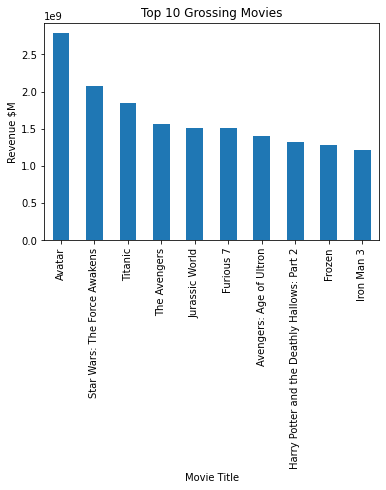

In [19]:
# List the stats for the Top 10 grossing movies by revenue (function / bar chart)
df.groupby('original_title')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
df['budget']>0
plt.title("Top 10 Grossing Movies")
plt.xlabel("Movie Title")
plt.ylabel("Revenue $M")

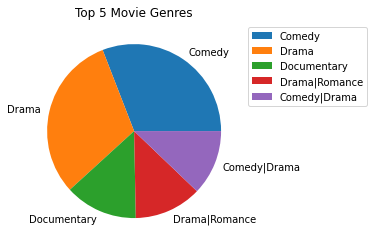

In [20]:
# Out of the top 5 genres Comedy and Drama are included in 4 of the categories (aggregate function / pie chart)
df['genres'].value_counts().head(5).groupby(level=0, group_keys=False).head(5).plot(kind='pie')
plt.title("Top 5 Movie Genres")
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [21]:
# List the count of Top 10 movie genres (aggregate function / stats)
df['genres'].value_counts().head(10).groupby(level=0, group_keys=False).head()

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

Text(0, 0.5, 'Numeber of Movies')

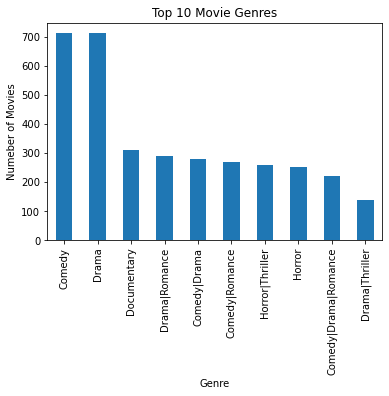

In [22]:
# List the count of Top 10 movie genres (aggregate function / bar chart)
df['genres'].value_counts().head(10).groupby(level=0, group_keys=False).head(5).plot(kind='bar')
plt.title("Top 10 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Numeber of Movies")

Text(0, 0.5, 'Count')

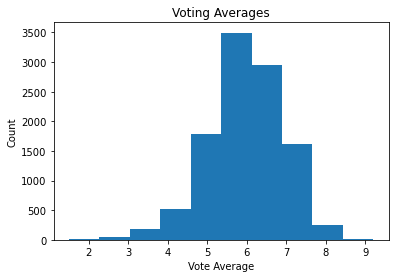

In [23]:
# Average voting (bar chart) using a Histogram
df['vote_average'].plot(kind='hist');
plt.title("Voting Averages")
plt.xlabel("Vote Average")
plt.ylabel("Count")

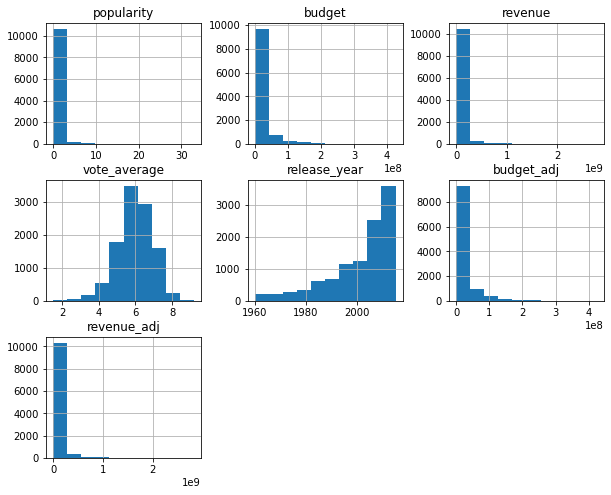

In [24]:
# Histogram of columns used in analysis (stats / bar charts)
df.hist(figsize=(10,8));

Text(0.5, 0, 'revenue')

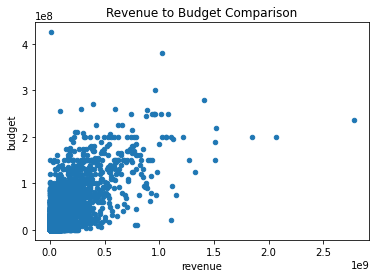

In [25]:
# Revenue to Budget comparison (scatter chart)
df.plot(x='revenue', y='budget', kind='scatter')
plt.title("Revenue to Budget Comparison")
plt.xlabel("revenue")

### Research Question 2 (Do higher budget's by genre generate higher revenue's?)
> **Findings**: After looking at the analysis, only 20% of the budget by genre represents the top 10 of revenue by genre. The Family/Fantasy/Adventure and the Fantasy/Adventure/Action/Family/Romance genres are part of the top 10 budget and revenues collectively. 

In [26]:
# Average budget for Top 10 Genres
from babel.numbers import format_currency

df.groupby('genres').budget.mean().sort_values(ascending=False).head(10).apply(lambda x: format_currency(x, currency="USD", locale="en_US"))

genres
Adventure|Fantasy|Action|Western|Thriller          $425,000,000.00
Thriller|Action|Adventure|Science Fiction          $209,000,000.00
Family|Fantasy|Adventure                           $200,000,000.00
Adventure|Action|Fantasy                           $198,000,000.00
Action|Family|Science Fiction|Adventure|Mystery    $190,000,000.00
Animation|Adventure|Comedy|Family|Action           $185,000,000.00
Fantasy|Adventure|Action|Family|Romance            $180,000,000.00
Science Fiction|Fantasy|Action|Adventure           $176,000,003.00
War|Adventure|Drama                                $175,000,000.00
Fantasy|Adventure|Animation|Family                 $165,000,000.00
Name: budget, dtype: object

In [27]:
# Average revenue for Top 10 Genres
from babel.numbers import format_currency

df.groupby('genres').revenue.mean().sort_values(ascending=False).head(10).apply(lambda x: format_currency(x, currency="USD", locale="en_US"))

genres
Crime|Drama|Mystery|Thriller|Action                  $1,106,279,658.00
Action|Adventure|Science Fiction|Fantasy             $1,034,089,112.50
Family|Fantasy|Adventure                             $1,025,467,110.00
Adventure|Fantasy|Family|Mystery                       $938,212,738.00
Science Fiction|Thriller|Action|Adventure              $847,423,452.00
Action|Thriller|Science Fiction|Mystery|Adventure      $825,500,000.00
Science Fiction|Adventure|Family|Fantasy               $792,910,554.00
Family|Animation|Drama                                 $788,241,776.00
Fantasy|Adventure|Action|Family|Romance                $758,410,378.00
Comedy|Adventure|Fantasy|Animation|Family              $752,600,867.00
Name: revenue, dtype: object

<a id='conclusions'></a>
## Conclusions

> **Note:** In conclusion, I found out that the data in the analysis proofed to be true in some scenario's and false in others. For one you don't have to spend a lot of money on your budget, to have a well-liked movie. However, if you are concerned with revenue, you better invest wisely into your production. The statistics proof to provide value after analyzing and digging into the data.
